In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

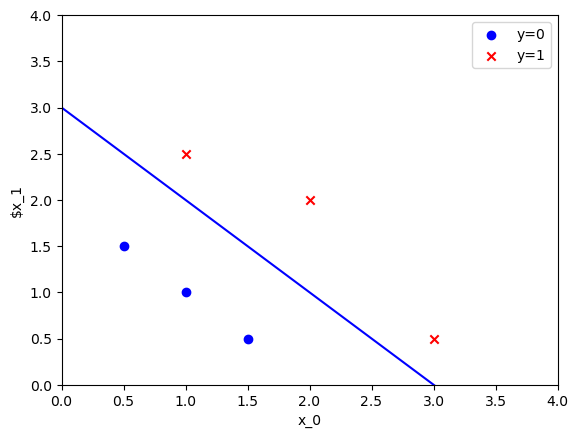

In [4]:
def plot_data(x,y,ax):
    neg = y==0
    pos = y==1
    ax.scatter(x[neg,0], x[neg,1], marker='o', c='b', label="y=0")
    ax.scatter(x[pos,0], x[pos,1], marker='x', c='r', label="y=1")
    ax.legend()

fig, ax = plt.subplots(1,1)
x0=np.arange(0,6)
x1 = 3-x0
plot_data(x_train, y_train, ax)
ax.axis([0,4,0,4])
ax.set_xlabel("x_0")
ax.set_ylabel("$x_1")
ax.plot(x0,x1, c='b')

In [7]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [9]:
def compute_logistic_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w)+b)
        for j in range(n):
            dj_dw[j] += (f_wb_i - y[i]) * x[i,j]
        dj_db += (f_wb_i - y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [11]:
def gradient_decent_logistic(x,y,w_in,b_in, alpha, num_iter, compute_gradient):
    w = w_in
    b = b_in
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w,b

In [13]:
w = np.zeros_like(x_train[0])
b = 0.0
alpha = 0.1
iterations = 10000
w_out, b_out = gradient_decent_logistic(x_train, y_train, w, b, alpha, iterations, compute_logistic_gradient)
print(f"w:{w_out}, b:{b_out}")

w:[5.28123029 5.07815608], b:-14.222409982019837


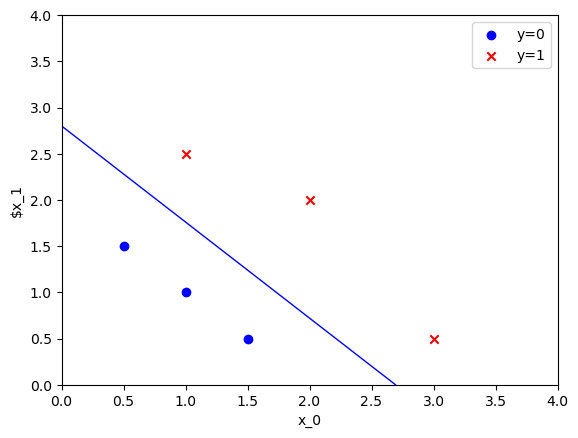

In [15]:
fig, ax = plt.subplots(1,1)
plot_data(x_train, y_train, ax)
ax.axis([0,4,0,4])
ax.set_xlabel("x_0")
ax.set_ylabel("$x_1")

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0], [x1,0], c='b',lw=1)

In [17]:
def predict(x,w,b):
    y_pre = np.zeros(x_train.shape[0])
    for i in range(len(y_pre)):
        y_pre[i] = sigmoid(np.dot(x[i],w)+b)
    return y_pre

In [19]:
y_pre = predict(x_train, w_out, b_out)
print(f"Predicted Values are: {y_pre}")

Predicted Values are: [0.01862297 0.02057229 0.02272091 0.98463772 0.99849336 0.97711696]
